In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# ─── load full dataset (with fallback) ─────────────────────────────────────
try:
    df = pd.read_csv('car_prices.csv', sep=',', engine='python', on_bad_lines='skip')
    print("Loaded from local file")
except Exception:
    df = pd.read_csv(
        'https://raw.githubusercontent.com/bagusganjarl/used-car-auction-prices/main/car_prices.csv',
        sep=',',
        engine='python',
        on_bad_lines='skip'
    )
    print("Loaded from remote URL")

print("Full dataset shape:", df.shape)

# ─── down-sample to 10 000 random rows ────────────────────────────────────
df = df.sample(n=20_000, random_state=42).reset_index(drop=True)
print("Sampled dataset shape:", df.shape)

# ─── inspect ────────────────────────────────────────────────────────────
df.head()


Loaded from remote URL
Full dataset shape: (558806, 16)
Sampled dataset shape: (20000, 16)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2012,Nissan,Altima,2.5,Sedan,automatic,1n4al2ap9cc198749,ca,3.7,65151.0,black,black,dtg operations inc,10150,10500,Tue Jan 27 2015 04:30:00 GMT-0800 (PST)
1,2013,Toyota,Camry,SE,Sedan,automatic,4t1bf1fk2du234284,fl,3.2,56144.0,silver,black,the hertz corporation,13300,9500,Wed Apr 29 2015 02:15:00 GMT-0700 (PDT)
2,2003,Honda,Civic,Hybrid,Sedan,automatic,jhmes966x3s021767,pa,2.5,171959.0,gray,beige,pohanka lexus,1925,2300,Fri Mar 06 2015 01:00:00 GMT-0800 (PST)
3,2010,Nissan,Armada,Platinum,SUV,automatic,5n1ba0nf7an610965,tx,3.6,115065.0,silver,black,all american chevrolet of midland,11600,13000,Wed Feb 04 2015 02:20:00 GMT-0800 (PST)
4,2014,Nissan,Pathfinder,SL,SUV,automatic,5n1ar2mm2ec622183,tn,4.5,15721.0,—,gray,nissan north america inc.,29400,29600,Thu Feb 26 2015 02:00:00 GMT-0800 (PST)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          20000 non-null  int64  
 1   make          19666 non-null  object 
 2   model         19662 non-null  object 
 3   trim          19646 non-null  object 
 4   body          19553 non-null  object 
 5   transmission  17608 non-null  object 
 6   vin           20000 non-null  object 
 7   state         20000 non-null  object 
 8   condition     19571 non-null  float64
 9   odometer      19996 non-null  float64
 10  color         19970 non-null  object 
 11  interior      19970 non-null  object 
 12  seller        20000 non-null  object 
 13  mmr           20000 non-null  int64  
 14  sellingprice  20000 non-null  int64  
 15  saledate      20000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 2.4+ MB


In [3]:
df.isnull().sum()

year               0
make             334
model            338
trim             354
body             447
transmission    2392
vin                0
state              0
condition        429
odometer           4
color             30
interior          30
seller             0
mmr                0
sellingprice       0
saledate           0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['make'] = df['make'].str.lower().str.strip()
df['model'] = df['model'].str.lower().str.strip()
df['trim'] = df['trim'].str.lower().str.strip()
df['body'] = df['body'].str.lower().str.strip()
df['transmission'] = df['transmission'].str.lower().str.strip()
print(df['body'].unique())

['sedan' 'suv' 'king cab' 'hatchback' 'supercab' 'supercrew' 'g sedan' nan
 'wagon' 'minivan' 'van' 'convertible' 'crew cab' 'g coupe' 'coupe'
 'regular cab' 'quad cab' 'crewmax cab' 'elantra coupe' 'xtracab'
 'genesis coupe' 'e-series van' 'double cab' 'extended cab' 'koup'
 'cts coupe' 'mega cab' 'g convertible' 'access cab' 'promaster cargo van'
 'club cab' 'beetle convertible' 'cts-v coupe' 'tsx sport wagon'
 'q60 convertible' 'cab plus' 'granturismo convertible' 'g37 convertible']


In [6]:
df['color'].unique()

array(['black', 'silver', 'gray', '—', 'red', 'white', 'blue', 'green',
       'burgundy', 'brown', 'charcoal', 'beige', 'gold', 'purple',
       'off-white', nan, 'orange', 'yellow', 'turquoise', 'pink'],
      dtype=object)

In [7]:

color_mode = df['color'].mode()[0]
df['color'] = df['color'].replace('—', color_mode)
interior_mode = df['interior'].mode()[0]
df['interior'] = df['interior'].replace('—', interior_mode)
print(df[['color', 'interior']].head())




    color interior
0   black    black
1  silver    black
2    gray    beige
3  silver    black
4   black     gray


In [8]:
df['body'].unique()

array(['sedan', 'suv', 'king cab', 'hatchback', 'supercab', 'supercrew',
       'g sedan', nan, 'wagon', 'minivan', 'van', 'convertible',
       'crew cab', 'g coupe', 'coupe', 'regular cab', 'quad cab',
       'crewmax cab', 'elantra coupe', 'xtracab', 'genesis coupe',
       'e-series van', 'double cab', 'extended cab', 'koup', 'cts coupe',
       'mega cab', 'g convertible', 'access cab', 'promaster cargo van',
       'club cab', 'beetle convertible', 'cts-v coupe', 'tsx sport wagon',
       'q60 convertible', 'cab plus', 'granturismo convertible',
       'g37 convertible'], dtype=object)

In [9]:
def map_body_type(body):
    if isinstance(body, str):
        body = body.lower()
        if 'sedan' in body or 'g sedan' in body:
            return 'Sedan'
        elif 'coupe' in body or 'g coupe' in body or 'genesis coupe' in body or 'elantra coupe' in body or 'cts coupe' in body or 'cts-v coupe' in body or 'q60 coupe' in body or 'koup' in body:
            return 'Coupe'
        elif 'convertible' in body or 'g convertible' in body or 'beetle convertible' in body or 'g37 convertible' in body or 'q60 convertible' in body or 'granturismo convertible' in body:
            return 'Convertible'
        elif 'hatchback' in body:
            return 'Hatchback'
        elif 'suv' in body:
            return 'SUV'
        elif 'minivan' in body or 'van' in body or 'e-series van' in body or 'promaster cargo van' in body or 'transit van' in body:
            return 'Minivan'
        elif 'wagon' in body or 'tsx wagon' in body or 'tsx sport wagon' in body or 'cts wagon' in body:
            return 'Wagon'
        elif 'crew cab' in body or 'extended cab' in body or 'regular-cab' in body or'regular cab' in body or 'double cab' in body or 'supercab' in body or 'king cab' in body or 'quad cab' in body or 'mega cab' in body or 'club cab' in body or 'access cab' in body or 'crewmax cab' in body or 'cab plus 4' in body or 'supercrew' in body or 'xtracab' in body or 'pickup' in body:
            return 'Pickup Truck'
        else:
            return body
    else:
        return None # Handle non-string values (like NaN)

df['body'] = df['body'].apply(map_body_type)
df['body'].unique()

array(['Sedan', 'SUV', 'Pickup Truck', 'Hatchback', None, 'Wagon',
       'Minivan', 'Convertible', 'Coupe', 'cab plus'], dtype=object)

In [10]:
df['body'].value_counts()

body
Sedan           8895
SUV             5194
Pickup Truck    1645
Minivan         1145
Hatchback        955
Coupe            730
Wagon            592
Convertible      396
cab plus           1
Name: count, dtype: int64

In [11]:
selected_columns = ['odometer', 'make', 'model', 'body', 'transmission', 'condition']
df_model = df[selected_columns + ['sellingprice']]
df_model.head()

,odometer,make,model,body,transmission,condition,sellingprice
0,65151.0,nissan,altima,Sedan,automatic,3.7,10500
1,56144.0,toyota,camry,Sedan,automatic,3.2,9500
2,171959.0,honda,civic,Sedan,automatic,2.5,2300
3,115065.0,nissan,armada,SUV,automatic,3.6,13000
4,15721.0,nissan,pathfinder,SUV,automatic,4.5,29600


In [12]:
df_model.shape

(20000, 7)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib, numpy as np

# ─── raw columns & target ──────────────────────────────────────────
selected_columns = ['odometer', 'make', 'model', 'body',
                    'transmission', 'condition']
target = 'sellingprice'

X = df[selected_columns].copy()
y = df[target].copy()

# ─── preprocessing sub-pipelines ───────────────────────────────────
num_cols = ['odometer', 'condition']
cat_cols = ['make', 'model', 'body', 'transmission']

numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',     OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('num', numeric_pipe, num_cols),
    ('cat', categorical_pipe, cat_cols)
])

# ─── full model ----------------------------------------------------
model = Pipeline([
    ('prep', preprocess),
    ('reg',  LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# ─── evaluation (same as before) -----------------------------------
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
print(f"RMSE : {rmse:,.0f}")
print(f"R²   : {r2:.3f}")

# ─── save ONE artefact ---------------------------------------------
joblib.dump(model, 'car_price_pipeline.pkl')
print("Saved → car_price_pipeline.pkl")


RMSE : 4,816
R²   : 0.755
Saved → car_price_pipeline.pkl


In [14]:
# Compute mean selling price over the entire dataset
mean_price = df_model['sellingprice'].mean()
print(f"Average selling price: ${mean_price:,.2f}")


Average selling price: $13,595.82


In [15]:
# After your train/test split and prediction
mean_test_price = y_test.mean()
print(f"Average selling price (test set): ${mean_test_price:,.2f}")


Average selling price (test set): $13,725.46


In [16]:
# assuming you already have `rmse` from before
r_rmse = rmse / mean_test_price * 100
print(f"Relative RMSE: {r_rmse:.1f}% of average price")


Relative RMSE: 35.1% of average price


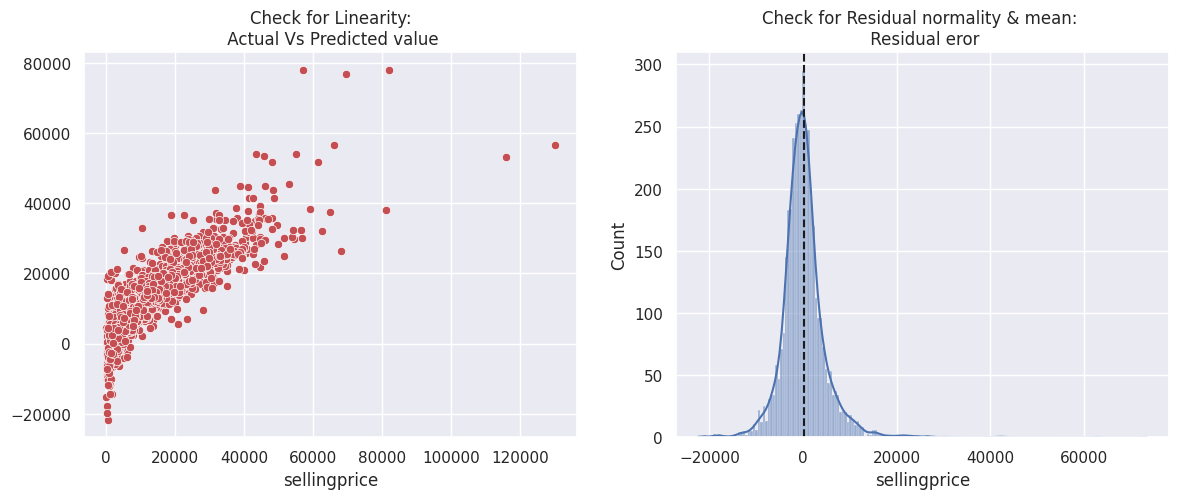

In [17]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');